<h3>Narrative analytics and experimentation</h3>

<h2>Houston Proeprty Tax Data Exploration</h2>

We will work on Harris County Appraisal District (HCAD) real property dataset. This database has more than 1 million records. It consists of multiple tables covering features such as property size, market value, number of bedrooms, name of owners and etc.

HCAD data is used for actual annual property tax calculation for all real properties in Houston, Texas. And because the property tax is the main revenue source for Houston city, we can assume that it contains almost all habitable or useful real estate properties in Harris county.

Following we will explore part of the whole dataset and will focus on certain dimention such as building size, market value, having mortgage and zip locations.

In [60]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
from matplotlib import rcParams

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
fig=plt.figure()
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.stats import ttest_ind
from scipy import stats


In [80]:
df = pd.read_csv("C:/Users/aath/Dropbox/MAEN/Thankful/Data/hcad/Has_mort_agent Query2.csv")

In [83]:
df.head(10)

,Has_mort_agent_ACCOUNT,real_acct_ACCOUNT,MAIL_CITY,MAIL_STATE,MAIL_COUNTRY,SITE_ADDR_1,SITE_ADDR_2,SITE_ADDR_3,STATE_CLASS,MAP_FACET,...,569D,7469.02,1245,1994,1288,40200,180900,18135,204919,204919.1
0,NaN,7.302100e+11,HOUSTON,TX,NaN,12107 BEDFORD ST,HOUSTON,77031.0,A1,4952B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,7.302100e+11,HOUSTON,TX,NaN,12119 BEDFORD ST,HOUSTON,77031.0,A1,4952B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,7.302100e+11,HOUSTON,TX,NaN,12131 BEDFORD ST,HOUSTON,77031.0,A1,4952B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,7.302100e+11,HOUSTON,TX,NaN,0 BEDFORD ST,HOUSTON,77031.0,F1,4952B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,7.302100e+11,SUGAR LAND,TX,NaN,12207 BEDFORD ST,HOUSTON,77031.0,F1,4952B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,7.302100e+11,HOUSTON,TX,NaN,0,HOUSTON,77002.0,X1,5457A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.302100e+11,7.302100e+11,HOUSTON,TX,NaN,12211 BEDFORD ST,HOUSTON,77031.0,A1,4952B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,7.302100e+11,HOUSTON,TX,NaN,12303 BEDFORD ST,HOUSTON,77031.0,F1,4952D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,7.302100e+11,HOUSTON,TX,NaN,12311 1/2 BEDFORD ST,HOUSTON,77031.0,A1,4952D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,7.302100e+11,ALVARADO,TX,NaN,11302 DOVER,HOUSTON,77031.0,X3,4952B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df.describe()

,Has_mort_agent_ACCOUNT,real_acct_ACCOUNT,SITE_ADDR_3,NEIGHBORHOOD_CODE,NEIGHBORHOOD_GROUP,YR_IMPR,TOTAL_BUILDING_AREA,TOTAL_LAND_AREA,LAND_VALUE,IMPROVEMENT_VALUE,...,7469.02,1245,1994,1288,40200,180900,18135,204919,204919.1,col2
count,4.437610e+05,1.048575e+06,1.046767e+06,1.048575e+06,1.048575e+06,983642.000000,1.048575e+06,1.048575e+06,1.047834e+06,1.047834e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,443761.0
mean,1.089835e+12,1.097856e+12,7.720045e+04,3.522776e+03,1.088030e+04,1984.392594,3.149992e+03,3.670630e+04,8.807344e+04,2.076192e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
std,2.362523e+11,1.622428e+11,1.891036e+02,2.985879e+03,9.295845e+03,19.193298,2.157744e+04,1.055333e+07,6.173654e+05,1.844953e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
min,1.008000e+10,7.302100e+11,7.700200e+04,0.000000e+00,0.000000e+00,10.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
25%,1.044830e+12,1.004260e+12,7.705000e+04,1.032000e+03,1.812000e+03,1971.000000,1.325000e+03,5.583000e+03,1.866500e+04,7.329750e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
50%,1.153850e+12,1.144480e+12,7.708400e+04,2.502010e+03,8.026000e+03,1983.000000,1.821000e+03,7.215000e+03,2.710800e+04,1.217330e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
75%,1.245850e+12,1.221020e+12,7.738800e+04,7.070010e+03,1.901200e+04,2002.000000,2.487000e+03,9.375000e+03,4.530000e+04,1.786348e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
max,1.347070e+12,1.347070e+12,7.759800e+04,9.999000e+03,3.129900e+04,2017.000000,4.149765e+06,7.335984e+09,2.003272e+08,6.097304e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [237]:
# Prepare Mortgage status as yes and no values so later can conert them to dummy variables

df['mort_agent'] = df['Has_mort_agent_ACCOUNT'].apply(lambda x: 'yes' if not pd.isnull(x) else 'no')

In [238]:
df['build_age'] = 2018 - df['YR_IMPR']

In [239]:
# Select limited dimentions for data exploration

df1 = df[['SITE_ADDR_3', 'TOTAL_BUILDING_AREA', 'YR_IMPR', 'TOTAL_MARKET_VALUE', 'mort_agent', 'build_age']]

In [240]:
df1.describe()

,SITE_ADDR_3,TOTAL_BUILDING_AREA,YR_IMPR,TOTAL_MARKET_VALUE,build_age
count,1.046767e+06,1.048575e+06,983642.000000,1.047834e+06,983642.000000
mean,7.720045e+04,3.149992e+03,1984.392594,3.020695e+05,33.607406
std,1.891036e+02,2.157744e+04,19.193298,2.800346e+06,19.193298
min,7.700200e+04,0.000000e+00,10.000000,0.000000e+00,1.000000
25%,7.705000e+04,1.325000e+03,1971.000000,1.023170e+05,16.000000
50%,7.708400e+04,1.821000e+03,1983.000000,1.568630e+05,35.000000
75%,7.738800e+04,2.487000e+03,2002.000000,2.370000e+05,47.000000
max,7.759800e+04,4.149765e+06,2017.000000,1.132096e+09,2008.000000


In [241]:
# Create dummy variables

df2 = pd.get_dummies(data=df1, columns=['mort_agent'])

In [242]:
# Check to see if data are ready to be used for linear regression analysis

df2.isnull().any()

SITE_ADDR_3             True
TOTAL_BUILDING_AREA    False
YR_IMPR                 True
TOTAL_MARKET_VALUE      True
build_age               True
mort_agent_no          False
mort_agent_yes         False
dtype: bool

In [243]:
# The focus of this analysis is on residential properties so we eliminate obvious large commercial buildings

df2 = df2[df2.TOTAL_BUILDING_AREA <= 7000]

In [244]:
# The focus of this analysis is on residential properties so we eliminate obvious large commercial values

df2 = df2[df2.TOTAL_MARKET_VALUE <= 2000000]

In [245]:
# We can see that elimination of obvious commercial buildings does not change the size of total dataset

df2.describe()

,SITE_ADDR_3,TOTAL_BUILDING_AREA,YR_IMPR,TOTAL_MARKET_VALUE,build_age,mort_agent_no,mort_agent_yes
count,1.026130e+06,1.027911e+06,963729.000000,1.027911e+06,963729.000000,1.027911e+06,1.027911e+06
mean,7.720168e+04,1.897930e+03,1984.205543,1.969827e+05,33.794457,5.737987e-01,4.262013e-01
std,1.893057e+02,1.045317e+03,19.200084,1.922996e+05,19.200084,4.945240e-01,4.945240e-01
min,7.700200e+04,0.000000e+00,10.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00
25%,7.705100e+04,1.315000e+03,1971.000000,1.011600e+05,16.000000,0.000000e+00,0.000000e+00
50%,7.708400e+04,1.804000e+03,1983.000000,1.550000e+05,35.000000,1.000000e+00,0.000000e+00
75%,7.738800e+04,2.441000e+03,2002.000000,2.300000e+05,47.000000,1.000000e+00,1.000000e+00
max,7.759800e+04,7.000000e+03,2017.000000,2.000000e+06,2008.000000,1.000000e+00,1.000000e+00


In [246]:
# Eliminate non value rows and check the effect on total population

df3 = df2.dropna()

In [247]:
df3.describe()

,SITE_ADDR_3,TOTAL_BUILDING_AREA,YR_IMPR,TOTAL_MARKET_VALUE,build_age,mort_agent_no,mort_agent_yes
count,963695.000000,963695.000000,963695.000000,9.636950e+05,963695.000000,963695.000000,963695.000000
mean,77200.328945,2024.317498,1984.204931,2.072536e+05,33.795069,0.551837,0.448163
std,189.078934,953.692654,19.199951,1.901754e+05,19.199951,0.497306,0.497306
min,77002.000000,0.000000,10.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,77051.000000,1420.000000,1971.000000,1.127730e+05,16.000000,0.000000,0.000000
50%,77084.000000,1865.000000,1983.000000,1.609280e+05,35.000000,1.000000,0.000000
75%,77388.000000,2493.000000,2002.000000,2.367740e+05,47.000000,1.000000,1.000000
max,77598.000000,7000.000000,2017.000000,2.000000e+06,2008.000000,1.000000,1.000000


In [248]:
df3.isnull().any()

SITE_ADDR_3            False
TOTAL_BUILDING_AREA    False
YR_IMPR                False
TOTAL_MARKET_VALUE     False
build_age              False
mort_agent_no          False
mort_agent_yes         False
dtype: bool

In [249]:
df3.dtypes

SITE_ADDR_3            float64
TOTAL_BUILDING_AREA      int64
YR_IMPR                float64
TOTAL_MARKET_VALUE     float64
build_age              float64
mort_agent_no            uint8
mort_agent_yes           uint8
dtype: object

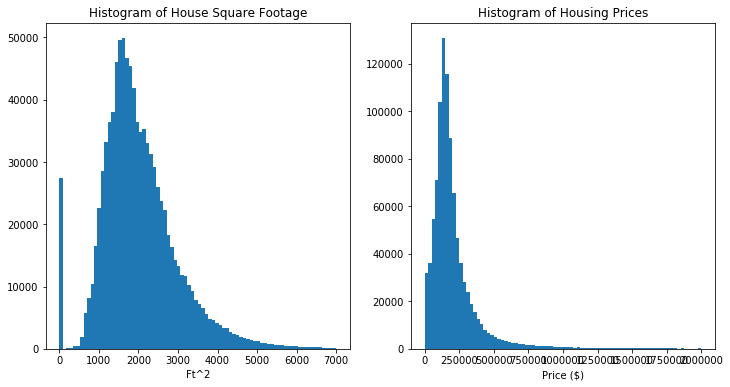

In [216]:
# Visualization of building versus value

fig = plt.figure(figsize=(12, 6))
sqft = fig.add_subplot(121)
cost = fig.add_subplot(122)

sqft.hist(df3.TOTAL_BUILDING_AREA, bins=80)
sqft.set_xlabel('Ft^2')
sqft.set_title("Histogram of House Square Footage")

cost.hist(df3.TOTAL_MARKET_VALUE, bins=80)
cost.set_xlabel('Price ($)')
cost.set_title("Histogram of Housing Prices")

plt.show()

In [217]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [222]:
# Performing a ordinary least square linear regression between buildin size and market value.

#Reg = ols(‘Dependent variable ~ independent variable(s), dataframe).fit()
#print(Reg.summary())

m = ols('TOTAL_MARKET_VALUE ~ TOTAL_BUILDING_AREA',df3).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:     TOTAL_MARKET_VALUE   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                 8.198e+05
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:05:36   Log-Likelihood:            -1.2785e+07
No. Observations:              963695   AIC:                         2.557e+07
Df Residuals:                  963693   BIC:                         2.557e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -6.643e+04    

<h3>The very high t-value indicates there is an extremely significant relationship between building size and market value. Also, with p value close to zero we can conclude that this relationship should not be due to statistical variations or chance. We can also say something about the magnitude of the building size coeficient and market price but since this is the whole dataset it would be more meaningful to look at the same in smaller geographic areas like within zip codes.</h3>

<h3>Below we add a second variable and can see that that the R-square increases slightly. Also this second model fits the data slighly better than using only one independant variable.</h3>

In [223]:
m = ols('TOTAL_MARKET_VALUE ~ TOTAL_BUILDING_AREA + YR_IMPR',df3).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:     TOTAL_MARKET_VALUE   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                 4.151e+05
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:05:47   Log-Likelihood:            -1.2782e+07
No. Observations:              963695   AIC:                         2.556e+07
Df Residuals:                  963692   BIC:                         2.556e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.133e+06    

<h3>Below visualization will communicate the regression model in more digetable format</h3>

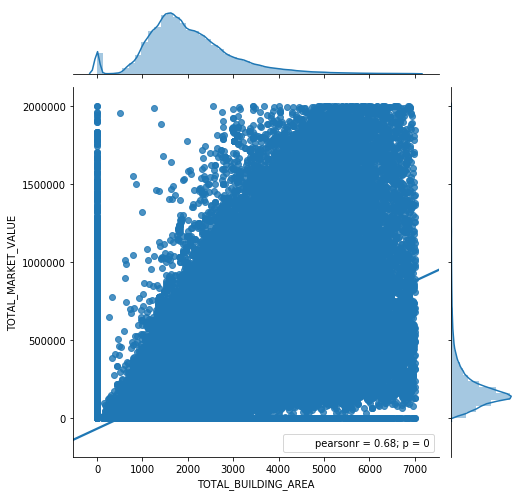

In [220]:
sns.jointplot(x="TOTAL_BUILDING_AREA", y="TOTAL_MARKET_VALUE", data=df3, kind = 'reg',fit_reg= True, size = 7)
plt.show()

<h3>One interesting hypothesis is to know if the size of property value has any relationship with financing of the same. Also, one may argue that the higher the value a property has the more the need for new owner to raise external financing to purchase such property. This makes sense as lower value properties are easier to finance with cash in hand but higher value ones are probably finaced with mortgages.</h3>

<h3>H0: There is no significant difference between property values and financing of the same
H1: There is a significant difference between property values and financing of the same.</h3>

In [227]:
# Performing a ordinary least square linear regression between market value and having mortgage.
m = ols('TOTAL_MARKET_VALUE ~ mort_agent_no + mort_agent_yes',df3).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:     TOTAL_MARKET_VALUE   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1013.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):          3.22e-222
Time:                        16:15:00   Log-Likelihood:            -1.3081e+07
No. Observations:              963695   AIC:                         2.616e+07
Df Residuals:                  963693   BIC:                         2.616e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.377e+05    129.781   1061.

<h3>Base on t-test we can reject the H0 but since R-square is very low we cannot use this linear model for this analysis. Let's do the same with property's age</h3>

In [254]:
# Performing a ordinary least square linear regression between market value and having mortgage.
m = ols('build_age ~ mort_agent_no + mort_agent_yes',df3).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:              build_age   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                 3.598e+04
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:29:25   Log-Likelihood:            -4.1974e+06
No. Observations:              963695   AIC:                         8.395e+06
Df Residuals:                  963693   BIC:                         8.395e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.2769      0.013   1730.

<h3>Using age instead of value improves R-square but still it is too low. Based on this analyis we may temporary conclude that there is no linear relationshp between age and value versus having mortgage</h3>

<h3>It will be interesting to check and see if this holds if we focus the analysis time frame within last 30 years as the market for financing has become more prevalent during last few decades. Another approach is to use the same dataset from diffent years. Also, we can create random sampling of the same dataset from each year of last 30 years. By this way we will have a timesereis of price growth over time, possibly following in growth of external financing. Current analysis is a single snapshot of current year and that could be the reason the R-sqaure is too low. Another reason of low R-square could be use of building age rather ownership age. Also, buildings change hand over time and if we assume they are financed with mortgage most of the time then a possible growth in financing should correlate with growth in value over time for those chaning ownership.</h3>